In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,r2_score,classification_report
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')


In [12]:
# Loading the data
df = pd.read_csv(r'C:\Users\Admin\Desktop\ecommerce_clickstream_transactions.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB


,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


In [47]:
df = df[['Timestamp', 'EventType']]
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['Day']= df['Timestamp'].dt.day
df['Day of Week']=df['Timestamp'].dt.dayofweek
df['Day Name']=df['Timestamp'].dt.day_name()
df['Hour']=df['Timestamp'].dt.hour
df.info()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    74817 non-null  datetime64[ns]
 1   EventType    74817 non-null  object        
 2   Day          74817 non-null  int64         
 3   Day of Week  74817 non-null  int64         
 4   Day Name     74817 non-null  object        
 5   Hour         74817 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.4+ MB


Index(['Timestamp', 'EventType', 'Day', 'Day of Week', 'Day Name', 'Hour'], dtype='object')

events <function <lambda> at 0x000001CC6C4BFA60>
    Day  Events
0     1    2713
1     2    2568
2     3    2583
3     4    2526
4     5    2508
5     6    2566
6     7    2584
7     8    2514
8     9    2520
9    10    2560
10   11    2566
11   12    2513
12   13    2534
13   14    2522
14   15    2508
15   16    2555
16   17    2547
17   18    2638
18   19    2556
19   20    2603
20   21    2543
21   22    2441
22   23    2648
23   24    2270
24   25    2171
25   26    2179
26   27    2126
27   28    2142
28   29    2171
29   30    1843
30   31    1099
    Day  Events
0     1    2713
1     2    2568
2     3    2583
3     4    2526
4     5    2508
5     6    2566
6     7    2584
7     8    2514
8     9    2520
9    10    2560
10   11    2566
11   12    2513
12   13    2534
13   14    2522
14   15    2508
15   16    2555
16   17    2547
17   18    2638
18   19    2556
19   20    2603
20   21    2543
21   22    2441
22   23    2648
23   24    2270
24   25    2171
25   26    2179
26   27

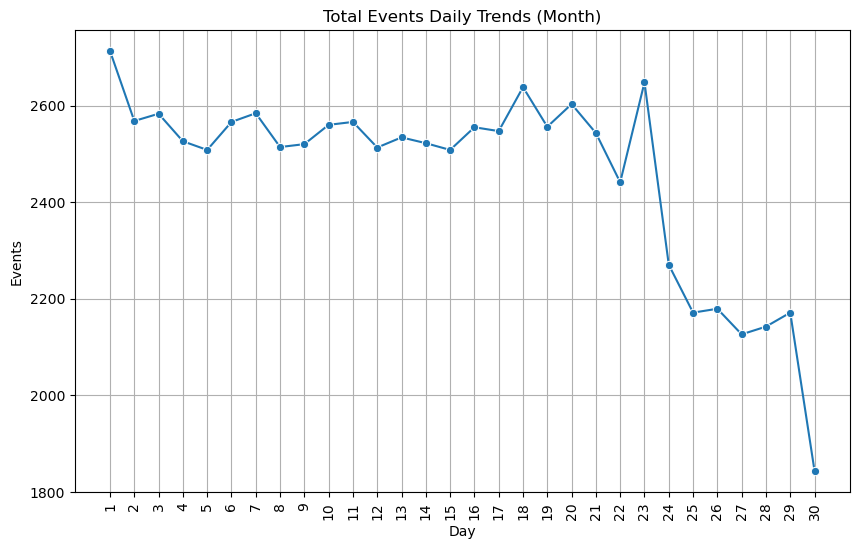

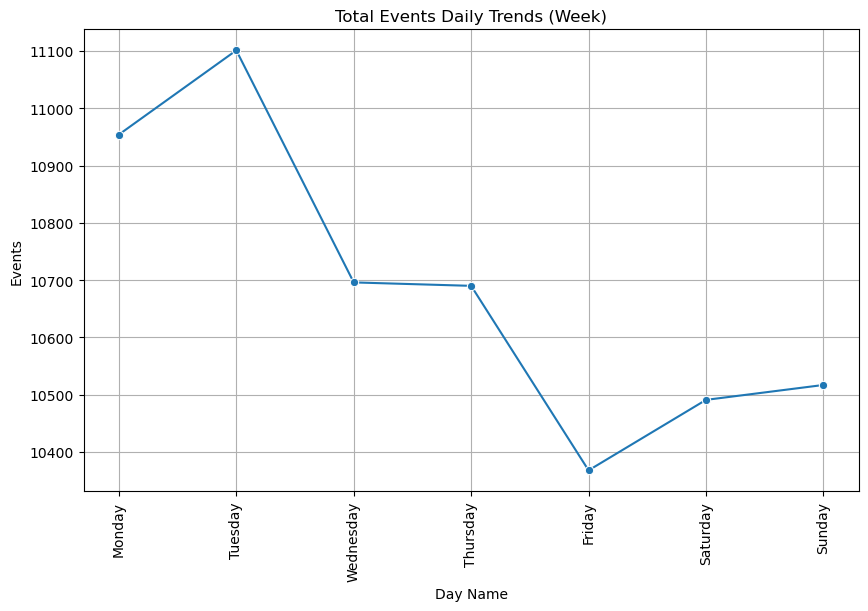

In [68]:
import matplotlib.pyplot as plt 
import seaborn as sns
def simple_lineplot(title, data, x):
    plt.figure(figsize=(10,6))
    plt.title(title)
    sns.lineplot(data=data, x=x, y='Events', marker='o')
    plt.xticks(data[x], rotation=90)
    plt.grid(True)
    plt.show()
events_count = lambda df, cols: df.groupby(cols).size().reset_index(name='Events')
print("events",events_count)

events_per_month = events_count(df, 'Day')
print(events_per_month)
events_per_month = events_per_month[events_per_month['Day'] < 31]
print(events_per_month)

simple_lineplot('Total Events Daily Trends (Month)', events_per_month, 'Day')
events_daily_week = events_count(df, ['Day Name', 'Day of Week'])
events_daily_week.sort_values('Day of Week', inplace=True)

simple_lineplot('Total Events Daily Trends (Week)', events_daily_week, 'Day Name')


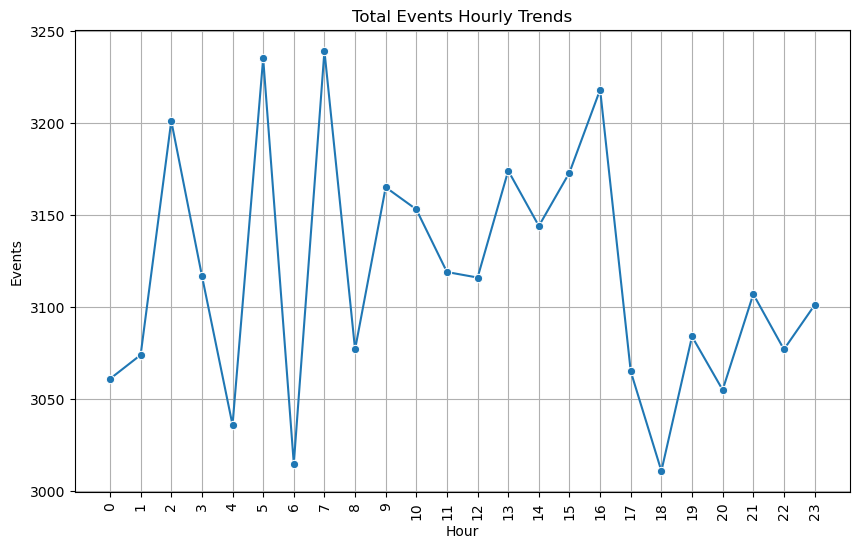

In [41]:
simple_lineplot('Total Events Hourly Trends', events_count(df, 'Hour'), 'Hour')

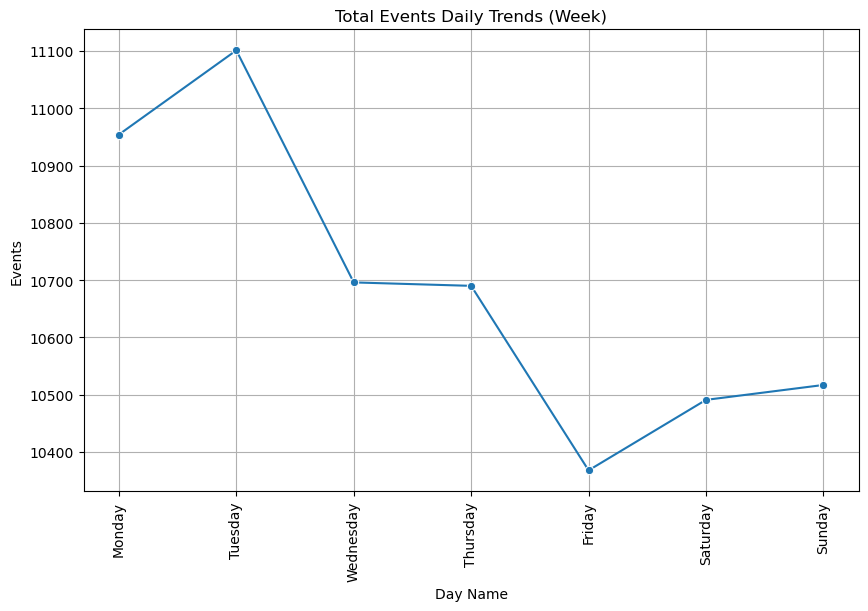

In [65]:
events_daily_week = events_count(df, ['Day Name', 'Day of Week'])
events_daily_week.sort_values('Day of Week', inplace=True)

simple_lineplot('Total Events Daily Trends (Week)', events_daily_week, 'Day Name')

['page_view', 'product_view', 'add_to_cart', 'login', 'click', 'logout', 'purchase']


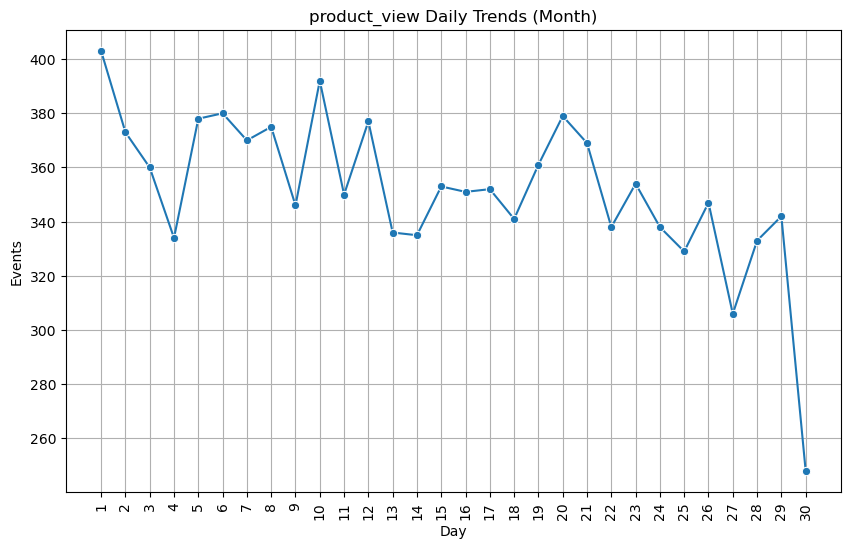

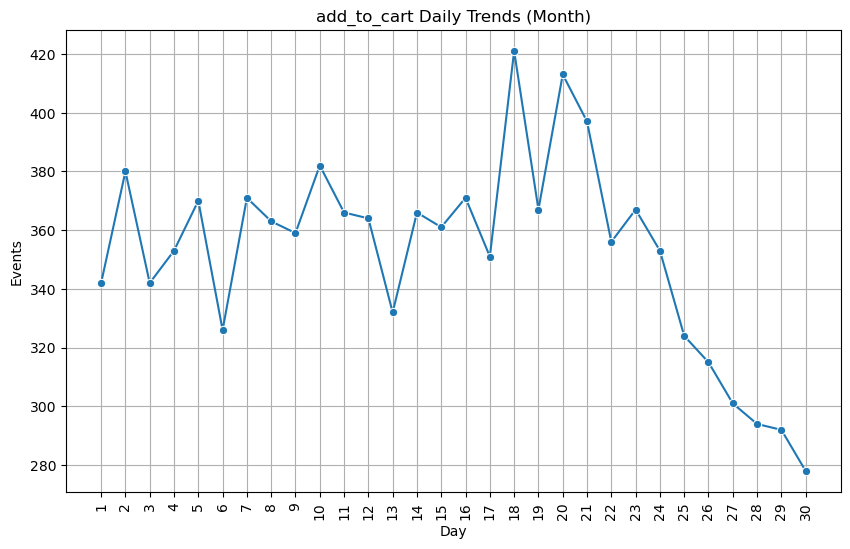

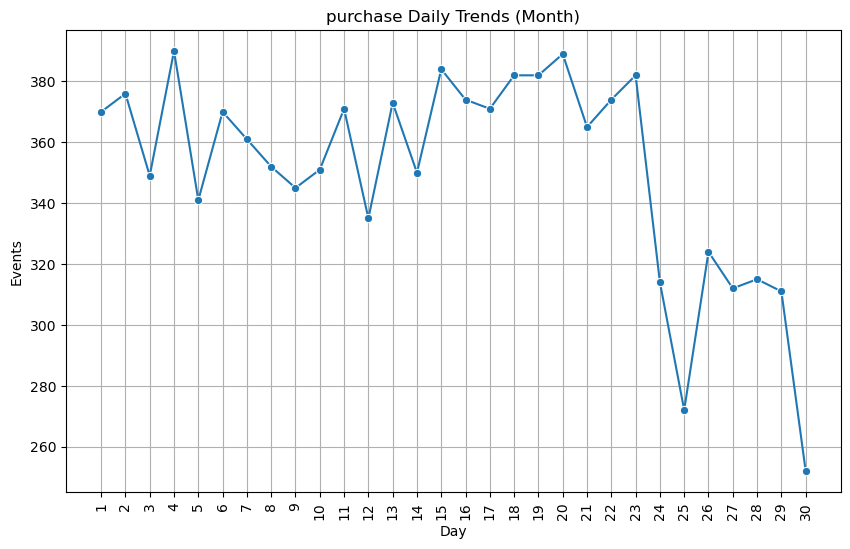

In [69]:
print(list(df['EventType'].unique()))
important_events = ['product_view', 'add_to_cart', 'purchase']

for event in important_events:
    df_event = df[df['EventType'] == event]
    
    data = events_count(df_event, 'Day')
    data = data[data['Day'] < 31]
    
    simple_lineplot(f'{event} Daily Trends (Month)', data, 'Day')

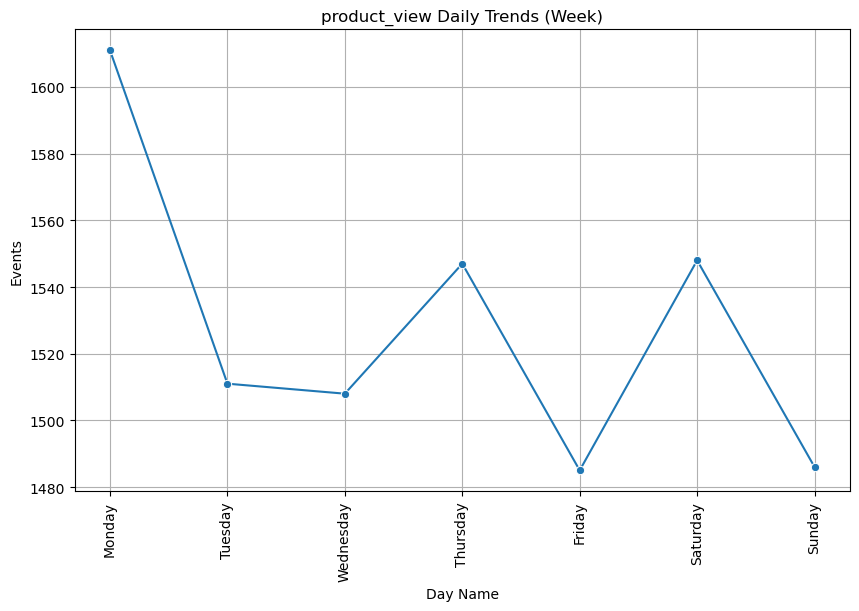

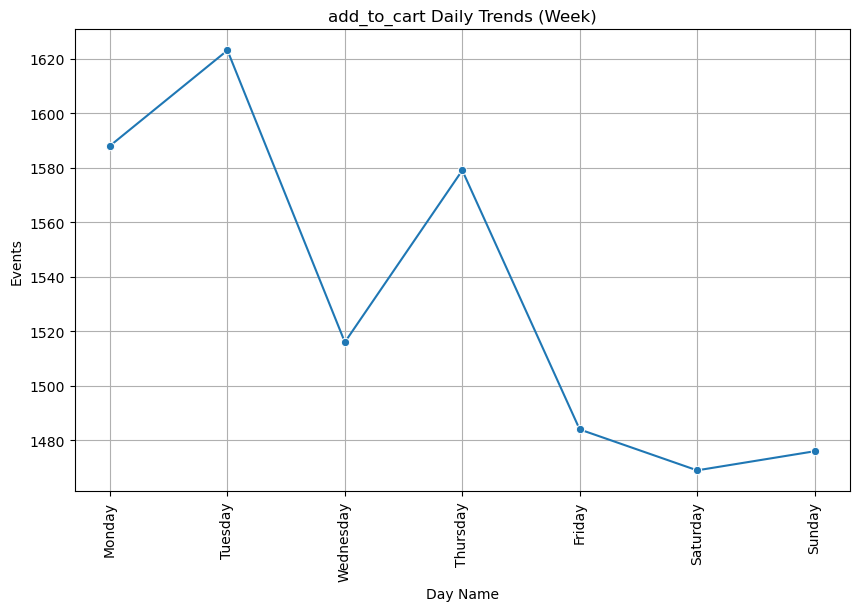

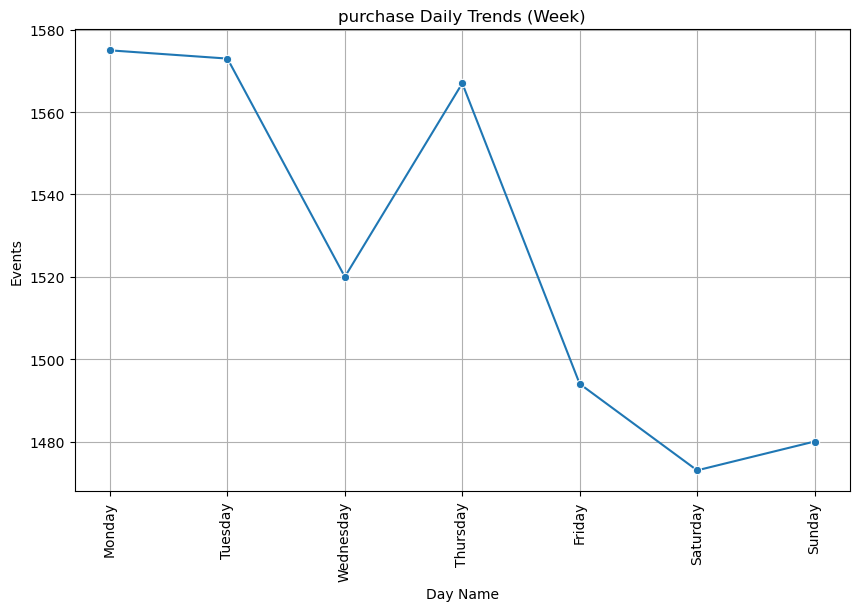

In [61]:
for event in important_events:
    df_event = df[df['EventType'] == event]
    
    data = events_count(df_event, ['Day Name', 'Day of Week'])
    data.sort_values('Day of Week', inplace=True)
    
    simple_lineplot(f'{event} Daily Trends (Week)', data, 'Day Name')

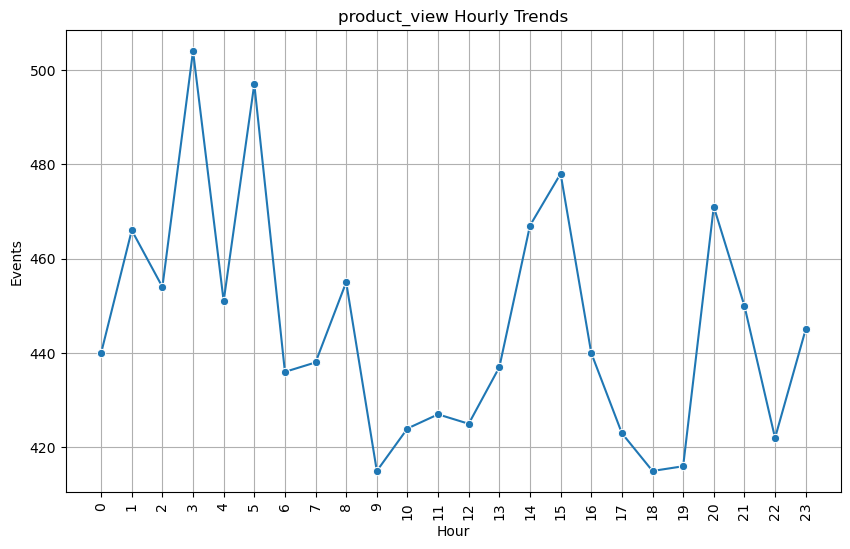

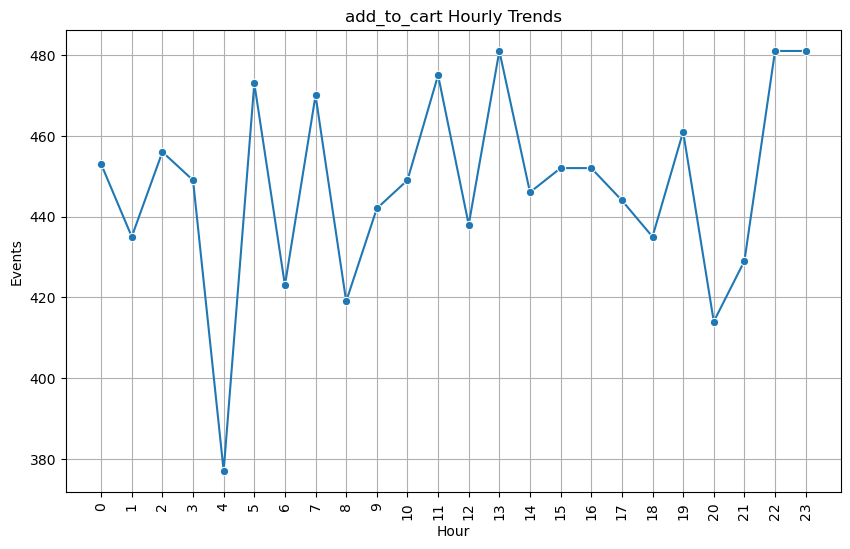

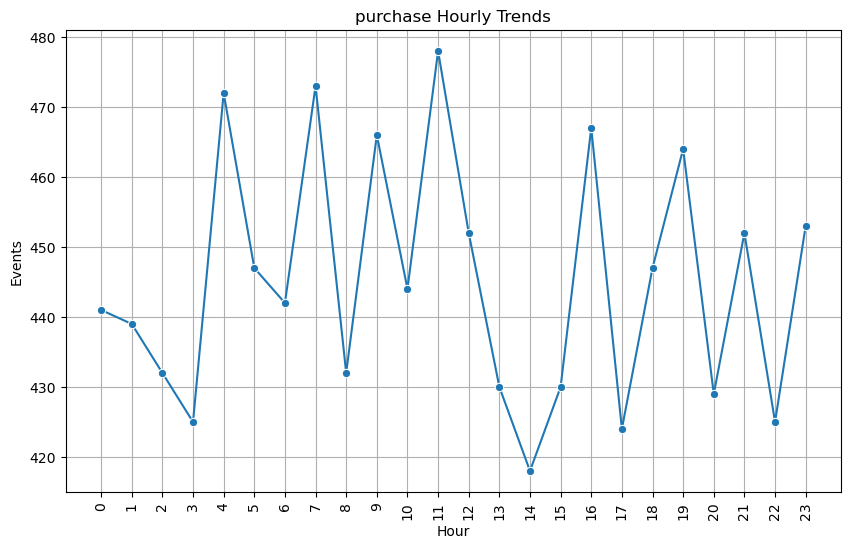

In [45]:
for event in important_events:
    df_event = df[df['EventType'] == event]
    
    simple_lineplot(f'{event} Hourly Trends', events_count(df_event, 'Hour'), 'Hour')

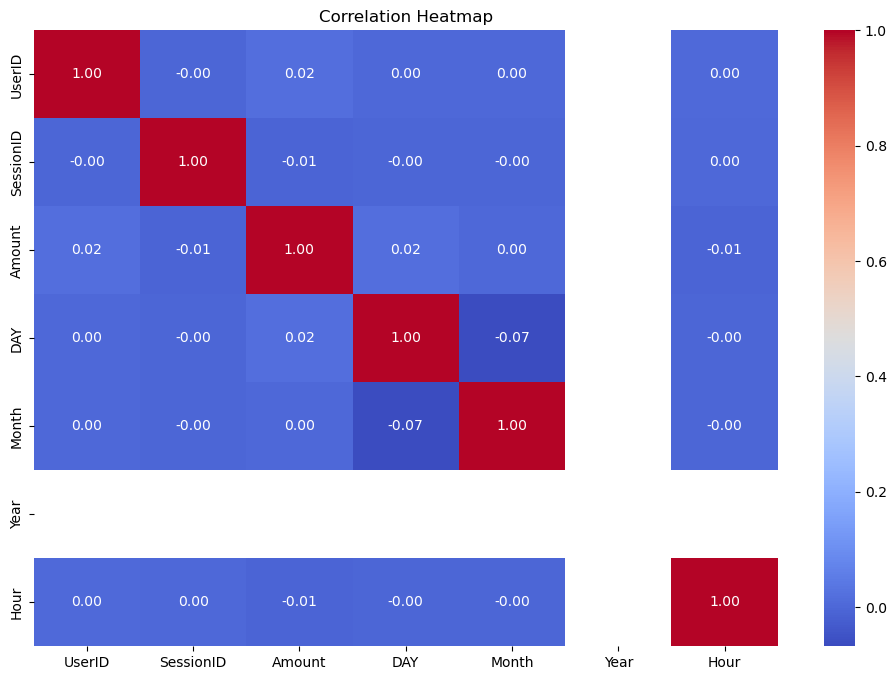

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv(r'C:\Users\Admin\Desktop\ecommerce_clickstream_transactions.csv')
print("Initial Data Head:")
print(data.head())
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['DAY'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year
data['Hour'] = data['Timestamp'].dt.hour

print("\nData Head after adding time-related features:")
print(data.head())
df_model = data.dropna(subset=['Outcome'])
X = df_model[['UserID', 'SessionID', 'Year', 'Month', 'DAY', 'Hour']]
y = df_model['Outcome']

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, ['Year', 'Month', 'DAY', 'Hour']), 
        ('cat', encoder, ['UserID', 'SessionID'])         
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Initial Data Head:
   UserID  SessionID                   Timestamp     EventType  ProductID  \
0       1          1  2024-07-07 18:00:26.959902     page_view        NaN   
1       1          1  2024-03-05 22:01:00.072000     page_view        NaN   
2       1          1  2024-03-23 22:08:10.568453  product_view  prod_8199   
3       1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4112   
4       1          1  2024-02-25 22:43:01.318876   add_to_cart  prod_3354   

   Amount Outcome  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

Data Head after adding time-related features:
   UserID  SessionID                  Timestamp     EventType  ProductID  \
0       1          1 2024-07-07 18:00:26.959902     page_view        NaN   
1       1          1 2024-03-05 22:01:00.072000     page_view        NaN   
2       1          1 2024-03-23 22:08:10.568453  product_view  prod_8199   
3       1          1 2024-03-12 00:32:05.495638